## Set up

In [1]:
# Importing Libraries
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import contextily as ctx
import descartes as dsc
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
from bokeh.models import ColumnDataSource, HoverTool, BoxZoomTool, ResetTool, SingleIntervalTicker,\
    Slider, Button, Label, CategoricalColorMapper, Legend, Circle, CheckboxButtonGroup, Select, NumeralTickFormatter

## Reading Manhattan Geopandas Data

In [2]:
# Importing the Neighbourhood boundaries data
dr = os.getcwd()
fdr = ''
in_f = 'neighbourhoods.geojson'

target = os.path.join(dr, fdr, in_f)

DF = gp.read_file(target)

In [3]:
# Importing the Airbnb listings data
dr = os.getcwd()
fdr = ''
in_f = 'listings.geojson'

target = os.path.join(dr, fdr, in_f)

df = gp.read_file(target)

In [32]:
# # Importing the Hotels data
dr = os.getcwd()
fdr = ''
in_f = 'sorted_hotels.geojson'

target = os.path.join(dr, fdr, in_f)

df_hotels = gp.read_file(target)

## Checking Coordinate Ref System (CRS)

In [33]:
# encode the data so as they map onto the Web Mercator scale
DF = DF.to_crs(epsg=3857)
df = df.to_crs(epsg=3857)
df_hotels = df_hotels.to_crs(epsg=3857)

## Filtering & Merging Data

In [15]:
# Removing all neighbourhoods outside Manhattan
DF1 = DF[DF.neighbourhood_group == 'Manhattan']
DF1

,neighbourhood,neighbourhood_group,geometry
18,Battery Park City,Manhattan,"MULTIPOLYGON (((-8239173.407 4970202.287, -823..."
43,Chinatown,Manhattan,"MULTIPOLYGON (((-8237641.317 4970831.912, -823..."
52,Chelsea,Manhattan,"MULTIPOLYGON (((-8236914.735 4975858.173, -823..."
53,Civic Center,Manhattan,"MULTIPOLYGON (((-8237419.012 4970060.124, -823..."
80,East Harlem,Manhattan,"MULTIPOLYGON (((-8230276.308 4985757.389, -823..."
87,East Village,Manhattan,"MULTIPOLYGON (((-8236607.493 4973300.426, -823..."
94,Financial District,Manhattan,"MULTIPOLYGON (((-8239173.407 4970202.287, -823..."
96,Flatiron District,Manhattan,"MULTIPOLYGON (((-8235792.300 4974269.053, -823..."
107,Gramercy,Manhattan,"MULTIPOLYGON (((-8235251.955 4973604.975, -823..."
117,Greenwich Village,Manhattan,"MULTIPOLYGON (((-8236691.650 4972853.241, -823..."


In [19]:
# Filtering and keeping only entire homes/apt in Manahattan for Airbnb
entire = df[df.room_type == 'Entire home/apt']
man = entire[entire.neighbourhood_group == 'Manhattan']
man1 = man[man.availability_365 > 100]
man1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
7,5222,Best Hideaway,7516,Marilyn,Manhattan,East Village,Entire home/apt,116,30,94,2016-06-15,0.73,1,347,POINT (-8235359.156 4972251.250)
18,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,Entire home/apt,190,7,0,,NaN,2,302,POINT (-8231933.855 4982423.106)
25,9357,Midtown Pied-a-terre,30193,Tommi,Manhattan,Hell's Kitchen,Entire home/apt,150,10,58,2017-08-13,0.48,1,142,POINT (-8236009.262 4978056.773)
41,12343,BEST BET IN HARLEM,47727,Earl,Manhattan,Harlem,Entire home/apt,150,7,100,2019-07-31,0.85,1,317,POINT (-8231495.256 4984614.359)
48,14287,Cozy 1BD on Central Park West in New York City,56094,Joya,Manhattan,Upper West Side,Entire home/apt,151,3,80,2019-09-09,0.68,1,109,POINT (-8234311.640 4980879.230)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48349,38551538,Modern Studio APT in the heart of K-TOWN,137669844,Yeonjoo,Manhattan,Midtown,Entire home/apt,170,3,0,,NaN,1,112,POINT (-8236196.279 4975074.968)
48354,38553206,Entire Studio in Downtown Manhattan,275978809,Longfeng,Manhattan,Chinatown,Entire home/apt,160,1,0,,NaN,1,356,POINT (-8237178.116 4970244.877)
48357,38553463,(3A) Bright 2 bed in luxury amenity building,278925199,Saul,Manhattan,Upper East Side,Entire home/apt,220,30,0,,NaN,10,263,POINT (-8233354.292 4977144.059)
48366,38557280,"convenient location in nyc entire apt,near subway",112452087,Hannah,Manhattan,East Harlem,Entire home/apt,400,1,0,,NaN,3,327,POINT (-8230677.058 4982574.566)


In [11]:
# Grouping dataframe by mean price
nh = pd.DataFrame(man1.groupby('neighbourhood')['price'].aggregate(np.mean))
nh

,price
neighbourhood,
Battery Park City,850.055556
Chelsea,333.712838
Chinatown,308.450000
Civic Center,200.400000
East Harlem,204.918660
East Village,259.864780
Financial District,274.015837
Flatiron District,530.695652
Gramercy,404.487805


In [47]:
# Merging the two dataframes
df_price = pd.merge(DF1, nh, on='neighbourhood')
df_price.set_index('price')

,neighbourhood,neighbourhood_group,geometry
price,,,
850.055556,Battery Park City,Manhattan,"MULTIPOLYGON (((-8239173.407 4970202.287, -823..."
308.450000,Chinatown,Manhattan,"MULTIPOLYGON (((-8237641.317 4970831.912, -823..."
333.712838,Chelsea,Manhattan,"MULTIPOLYGON (((-8236914.735 4975858.173, -823..."
200.400000,Civic Center,Manhattan,"MULTIPOLYGON (((-8237419.012 4970060.124, -823..."
204.918660,East Harlem,Manhattan,"MULTIPOLYGON (((-8230276.308 4985757.389, -823..."
259.864780,East Village,Manhattan,"MULTIPOLYGON (((-8236607.493 4973300.426, -823..."
274.015837,Financial District,Manhattan,"MULTIPOLYGON (((-8239173.407 4970202.287, -823..."
530.695652,Flatiron District,Manhattan,"MULTIPOLYGON (((-8235792.300 4974269.053, -823..."
404.487805,Gramercy,Manhattan,"MULTIPOLYGON (((-8235251.955 4973604.975, -823..."


## Plotting data

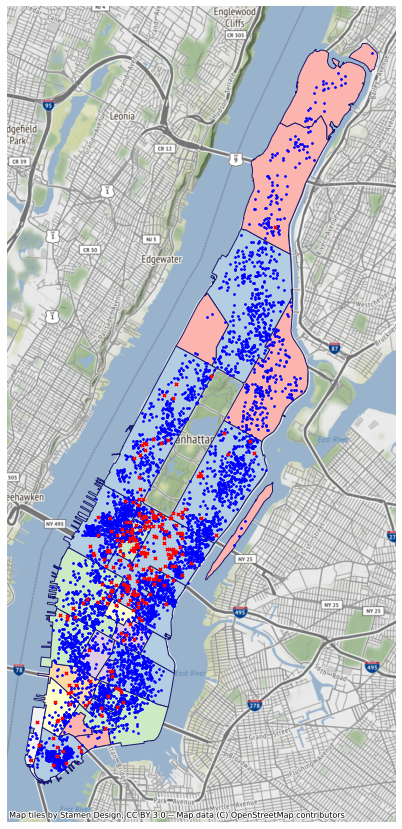

In [110]:
#plot the data
#df_price["center"] = df_price["geometry"].centroid
#df_price = df_price.copy()
#df_price.set_geometry("center", inplace = True)

cmap = mpl.cm.Pastel1
norm = mpl.colors.Normalize(vmin=100, vmax=900)

#cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
#                                  norm=norm,
#                                  orientation='horizontal')
#cb1.set_label('Average Price $') 

variable = 'price'

ax = df_price.plot(figsize=(10, 15), column=variable, alpha=1, edgecolor='midnightblue', cmap=cmap)
man1.plot(ax=ax, alpha=1, color='blue', markersize=3)
df_hotels.plot(ax=ax, alpha=1, color='red', marker="x", markersize=10)
#ax.add_tools(HoverTool(tooltips=TOOLTIPS, show_arrow=False, point_policy='follow_mouse'))

#texts = []

#for x, y, label in zip(df_price.geometry.x, df_price.geometry.y, df_price["neighbourhood"]):
    #texts.append(plt.text(x, y, label, fontsize = 8))
    
#plt.colorbar(cb1, ax=ax)   
ax.set_axis_off()
ctx.add_basemap(ax, url=ctx.providers.Stamen.Terrain)
plt.show()